<a href="https://colab.research.google.com/github/Jamalun/Data_Capstone_Design/blob/master/Financial_News_Sentimental_Analysis_self_labelling_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mecab 설치

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-11-04 14:48:34--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470, 2406:da00:ff00::22e9:9f55, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=LyZDHZmVW7N%2FNLPL1pxGxVPTsyU%3D&Expires=1636

# 캐글 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# 엑셀 파일 불러오기, header = none
df = pd.read_excel("/content/drive/MyDrive/Colab/Kaggle_translated.xlsx", names = ["sentiment","english", "korean" ],header=None)

In [ ]:
df

,sentiment,english,korean
0,neutral,"According to Gran , the company has no plans t...","Gran에 따르면, 비록 그 회사가 성장하고 있는 곳이지만, 그 회사는 러시아에 모..."
1,neutral,Technopolis plans to develop in stages an area...,"테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 100,0..."
2,negative,The international electronic industry company ...,국제적인 전자 산업 회사 Elcoteq는 그것의 Talinn 시설로부터 10명의 직...
3,positive,With the new production plant the company woul...,새로운 생산 공장과 함께 회사는 수요의 예상되는 증가를 충족시키기 위하여 그것의 능...
4,positive,According to the company 's updated strategy f...,"2009-2012년 회사의 최신 전략에 따르면, Basware는 순매출의 10%-2..."
...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,런던 마켓워치 -- FTSE 100에 대한 은행 주식의 반등이 더 큰 약세를 상쇄하...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,린쿠스키아의 맥주 판매량은 416만 리터로 6.5퍼센트 감소했고 카우노 알루스의 맥...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,"영업 이익은 EUR 12.3 mn의 선박 판매 이익을 포함하여, 2007년에 EUR..."
4844,negative,Net sales of the Paper segment decreased to EU...,종이 부문의 순매출은 2008년 2/4분기에 EUR 241.1 mn에서 2009년 ...


# self labelled data 불러오기

In [ ]:
df_self = pd.read_excel("/content/drive/MyDrive/Colab/self_labelled_data.xlsx", names = ["korean", "initial_label" ],header=None)

In [ ]:
df_self

,korean,initial_label
0,중국 투자의향기업 직접 방문·투자협약 체결 협의,2
1,여수광양항만공사(사장 방희석)는 14일부터 20일까지 광양항 배후단지 투자 유치를 ...,2
2,광양만권경제자유구역청과 합동으로 진행되는 이번 투자유치활동은 방희석 사장이 직접 중...,2
3,방 사장은 먼저 광양항 서측배후단지 푸드존 투자유치를 위해 중국 운남성 소재 커피 ...,2
4,이어 한중일 콜드체인 거점 구축을 위해 중국 안후이성 소재 냉동냉장창고 업체인 바이...,2
...,...,...
1021,여기에다 국내 광관련 기업들의 최신 기술과 경쟁력을 갖춘 다양한 신제품들도 선보였다.,2
1022,중기지방청은 일본 수출규제가 본격화된 지난 7월부터 ‘일본 수출규제 애로신고센터’를...,1
1023,"조사결과 피해가 우려되는 18개사에 대해 광주전남중기청, 비즈니스지원단 및 코트라 ...",1
1024,이들 업체에 대해서는 일본규제 피해가 해소될 때까지 전담직원이 1:1로 밀착관리할 ...,1


In [ ]:
df_self['initial_label'].unique()


array([2, 1, 3])

In [ ]:
temp_list = []
for i in df_self['initial_label']:
  if(i == 3):
    i = 0
  temp_list.append(i)
df_self['label'] = temp_list
df_self

,korean,initial_label,label
0,중국 투자의향기업 직접 방문·투자협약 체결 협의,2,2
1,여수광양항만공사(사장 방희석)는 14일부터 20일까지 광양항 배후단지 투자 유치를 ...,2,2
2,광양만권경제자유구역청과 합동으로 진행되는 이번 투자유치활동은 방희석 사장이 직접 중...,2,2
3,방 사장은 먼저 광양항 서측배후단지 푸드존 투자유치를 위해 중국 운남성 소재 커피 ...,2,2
4,이어 한중일 콜드체인 거점 구축을 위해 중국 안후이성 소재 냉동냉장창고 업체인 바이...,2,2
...,...,...,...
1021,여기에다 국내 광관련 기업들의 최신 기술과 경쟁력을 갖춘 다양한 신제품들도 선보였다.,2,2
1022,중기지방청은 일본 수출규제가 본격화된 지난 7월부터 ‘일본 수출규제 애로신고센터’를...,1,1
1023,"조사결과 피해가 우려되는 18개사에 대해 광주전남중기청, 비즈니스지원단 및 코트라 ...",1,1
1024,이들 업체에 대해서는 일본규제 피해가 해소될 때까지 전담직원이 1:1로 밀착관리할 ...,1,1


In [ ]:
df_self = df_self.drop(['initial_label'], axis = 'columns')
df_self

,korean,label
0,중국 투자의향기업 직접 방문·투자협약 체결 협의,2
1,여수광양항만공사(사장 방희석)는 14일부터 20일까지 광양항 배후단지 투자 유치를 ...,2
2,광양만권경제자유구역청과 합동으로 진행되는 이번 투자유치활동은 방희석 사장이 직접 중...,2
3,방 사장은 먼저 광양항 서측배후단지 푸드존 투자유치를 위해 중국 운남성 소재 커피 ...,2
4,이어 한중일 콜드체인 거점 구축을 위해 중국 안후이성 소재 냉동냉장창고 업체인 바이...,2
...,...,...
1021,여기에다 국내 광관련 기업들의 최신 기술과 경쟁력을 갖춘 다양한 신제품들도 선보였다.,2
1022,중기지방청은 일본 수출규제가 본격화된 지난 7월부터 ‘일본 수출규제 애로신고센터’를...,1
1023,"조사결과 피해가 우려되는 18개사에 대해 광주전남중기청, 비즈니스지원단 및 코트라 ...",1
1024,이들 업체에 대해서는 일본규제 피해가 해소될 때까지 전담직원이 1:1로 밀착관리할 ...,1


# 캐글 데이터 라벨링

In [ ]:
import numpy as np

In [ ]:
df

,sentiment,english,korean
0,neutral,"According to Gran , the company has no plans t...","Gran에 따르면, 비록 그 회사가 성장하고 있는 곳이지만, 그 회사는 러시아에 모..."
1,neutral,Technopolis plans to develop in stages an area...,"테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 100,0..."
2,negative,The international electronic industry company ...,국제적인 전자 산업 회사 Elcoteq는 그것의 Talinn 시설로부터 10명의 직...
3,positive,With the new production plant the company woul...,새로운 생산 공장과 함께 회사는 수요의 예상되는 증가를 충족시키기 위하여 그것의 능...
4,positive,According to the company 's updated strategy f...,"2009-2012년 회사의 최신 전략에 따르면, Basware는 순매출의 10%-2..."
...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,런던 마켓워치 -- FTSE 100에 대한 은행 주식의 반등이 더 큰 약세를 상쇄하...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,린쿠스키아의 맥주 판매량은 416만 리터로 6.5퍼센트 감소했고 카우노 알루스의 맥...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,"영업 이익은 EUR 12.3 mn의 선박 판매 이익을 포함하여, 2007년에 EUR..."
4844,negative,Net sales of the Paper segment decreased to EU...,종이 부문의 순매출은 2008년 2/4분기에 EUR 241.1 mn에서 2009년 ...


In [ ]:
labels = []
for sentiment in df['sentiment']:
  if (sentiment == 'neutral'):
    labels.append(1)
  if (sentiment == 'negative'):
    labels.append(0)
  if (sentiment == 'positive'):
    labels.append(2)

df['label'] = labels
  

In [ ]:
df['label'].unique()

array([1, 0, 2])

In [ ]:
df

,sentiment,english,korean,label
0,neutral,"According to Gran , the company has no plans t...","Gran에 따르면, 비록 그 회사가 성장하고 있는 곳이지만, 그 회사는 러시아에 모...",1
1,neutral,Technopolis plans to develop in stages an area...,"테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 100,0...",1
2,negative,The international electronic industry company ...,국제적인 전자 산업 회사 Elcoteq는 그것의 Talinn 시설로부터 10명의 직...,0
3,positive,With the new production plant the company woul...,새로운 생산 공장과 함께 회사는 수요의 예상되는 증가를 충족시키기 위하여 그것의 능...,2
4,positive,According to the company 's updated strategy f...,"2009-2012년 회사의 최신 전략에 따르면, Basware는 순매출의 10%-2...",2
...,...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,런던 마켓워치 -- FTSE 100에 대한 은행 주식의 반등이 더 큰 약세를 상쇄하...,0
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,린쿠스키아의 맥주 판매량은 416만 리터로 6.5퍼센트 감소했고 카우노 알루스의 맥...,1
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,"영업 이익은 EUR 12.3 mn의 선박 판매 이익을 포함하여, 2007년에 EUR...",0
4844,negative,Net sales of the Paper segment decreased to EU...,종이 부문의 순매출은 2008년 2/4분기에 EUR 241.1 mn에서 2009년 ...,0


In [ ]:
df = df.drop(['sentiment', 'english'], axis = 'columns')
df

,korean,label
0,"Gran에 따르면, 비록 그 회사가 성장하고 있는 곳이지만, 그 회사는 러시아에 모...",1
1,"테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 100,0...",1
2,국제적인 전자 산업 회사 Elcoteq는 그것의 Talinn 시설로부터 10명의 직...,0
3,새로운 생산 공장과 함께 회사는 수요의 예상되는 증가를 충족시키기 위하여 그것의 능...,2
4,"2009-2012년 회사의 최신 전략에 따르면, Basware는 순매출의 10%-2...",2
...,...,...
4841,런던 마켓워치 -- FTSE 100에 대한 은행 주식의 반등이 더 큰 약세를 상쇄하...,0
4842,린쿠스키아의 맥주 판매량은 416만 리터로 6.5퍼센트 감소했고 카우노 알루스의 맥...,1
4843,"영업 이익은 EUR 12.3 mn의 선박 판매 이익을 포함하여, 2007년에 EUR...",0
4844,종이 부문의 순매출은 2008년 2/4분기에 EUR 241.1 mn에서 2009년 ...,0


# 데이터 셋 두개 합치기

In [ ]:
df = pd.concat([df,df_self])
df

,korean,label
0,"Gran에 따르면, 비록 그 회사가 성장하고 있는 곳이지만, 그 회사는 러시아에 모...",1
1,"테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 100,0...",1
2,국제적인 전자 산업 회사 Elcoteq는 그것의 Talinn 시설로부터 10명의 직...,0
3,새로운 생산 공장과 함께 회사는 수요의 예상되는 증가를 충족시키기 위하여 그것의 능...,2
4,"2009-2012년 회사의 최신 전략에 따르면, Basware는 순매출의 10%-2...",2
...,...,...
1021,여기에다 국내 광관련 기업들의 최신 기술과 경쟁력을 갖춘 다양한 신제품들도 선보였다.,2
1022,중기지방청은 일본 수출규제가 본격화된 지난 7월부터 ‘일본 수출규제 애로신고센터’를...,1
1023,"조사결과 피해가 우려되는 18개사에 대해 광주전남중기청, 비즈니스지원단 및 코트라 ...",1
1024,이들 업체에 대해서는 일본규제 피해가 해소될 때까지 전담직원이 1:1로 밀착관리할 ...,1


In [ ]:
df['label'].unique()

array([1, 0, 2])

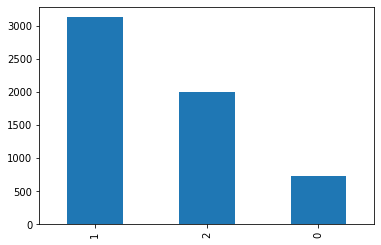

In [ ]:
import matplotlib.pyplot as plt
df['label'].value_counts().plot(kind = 'bar')

In [ ]:
# 중립 3131개, 긍정 2003개, 부정 738개
df['label'].value_counts()

1    3131
2    2003
0     738
Name: label, dtype: int64

In [ ]:
#총 데이터의 개수
df['korean'].nunique()

5857

In [ ]:
# NULL 값 유무 확인
print(df.isnull().values.any())

False


# train, test 셋 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 42)
print("훈련 데이터 개수 : ", len(train_data))
print("테스트 데이터 개수 : ", len(test_data))

훈련 데이터 개수 :  4697
테스트 데이터 개수 :  1175


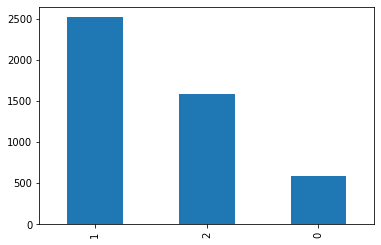

In [ ]:
# train set 분포
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
train_data

,korean,label
2029,승객 1인당 순매출은 증가할 것으로 예상된다.,2
743,이밖에도 금호터미널은 고객과의 소통 접점을 늘리기 위해 지난해 말 팟캐스트 채널을 ...,2
3129,"상트페테르부르크, 10월 14일 (프라임-타스) 핀란드 타이어 생산업체인 노키안 타...",2
210,"2007년, Encandpus는 NOK 69.3의 수익을 창출하였다.",1
3731,Rihko는 담배회사 Altadis의 유럽 사업부장을 맡은 후 2006년 여름 Ra...,1
...,...,...
3772,그 다리는 고속도로 14 개발 프로젝트의 일부이다.,1
345,호남지방통계청이 최근 발표한 ‘1월 광주·전남 고용동향’에 따르면 광주의 실업률은 ...,1
380,#.한식조리사와 향토음식지도사 자격증을 보유한 정인희(58·여)씨는 도라지 정과와 ...,1
544,이에 따라 ‘쪼그리’는 계속 변화했다.,2


In [ ]:
train_data.iloc[0]

korean    승객 1인당 순매출은 증가할 것으로 예상된다.
label                             2
Name: 2029, dtype: object

In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0    592
1      1   2516
2      2   1589


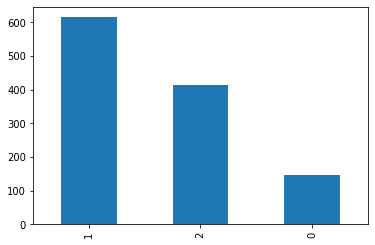

In [ ]:
#test set 분포
test_data['label'].value_counts().plot(kind = 'bar')

# 데이터 정제하기

In [ ]:
# 정규 표현식 사용하여 한국어 이외 모두 제거
import re
train_data['korean'] = train_data['korean'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['korean'].replace('', np.nan, inplace=True)
train_data = train_data.dropna(how='any') # Null 값 제거, 'how'= any 행에서 하나라도 결측치가 있다면 행삭제
print(train_data.isnull().sum())

korean    0
label     0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
# test data도 마찬가지
test_data.drop_duplicates(subset = ['korean'], inplace=True) # 중복 제거
test_data['korean'] = test_data['korean'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['korean'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print(test_data.isnull().sum())
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

korean    0
label     0
dtype: int64
전처리 후 테스트용 샘플의 개수 : 1175


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

# 토큰화

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
# 불용어 지정
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
# 형태소 분리 예시
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '뻔']


In [ ]:
#morphs로 형태소 추출
train_data['tokenized'] = train_data['korean'].apply(mecab.morphs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 불용어 처리
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_data

,korean,label,tokenized
2029,승객 인당 순매출은 증가할 것으로 예상된다,2,"[승객, 당, 순, 매출, 증가, 할, 것, 으로, 예상, 된다]"
743,이밖에도 금호터미널은 고객과의 소통 접점을 늘리기 위해 지난해 말 팟캐스트 채널을 ...,2,"[밖, 금호터미널, 고객, 소통, 접점, 늘리, 기, 위해, 지난해, 말, 팟캐스트..."
3129,상트페테르부르크 월 일 프라임타스 핀란드 타이어 생산업체인 노키안 타이어스는 년 러...,2,"[상트페테르부르크, 월, 일, 프라임, 타스, 핀란드, 타이어, 생산, 업체, 노,..."
210,년 는 의 수익을 창출하였다,1,"[년, 수익, 창출, 였]"
3731,는 담배회사 의 유럽 사업부장을 맡은 후 년 여름 의 베네콜 사업을 경영하기 시작했다,1,"[담배, 회사, 유럽, 사업, 부장, 맡, 후, 년, 여름, 베, 콜, 사업, 경영..."
...,...,...,...
3772,그 다리는 고속도로 개발 프로젝트의 일부이다,1,"[그, 다리, 고속도, 로, 개발, 프로젝트, 일부]"
345,호남지방통계청이 최근 발표한 월 광주전남 고용동향에 따르면 광주의 실업률은 로 작년...,1,"[호남, 지방, 통계청, 최근, 발표, 월, 광주, 전남, 고용, 동향, 따르, 면..."
380,한식조리사와 향토음식지도사 자격증을 보유한 정인희여씨는 도라지 정과와 도라지청 등 ...,1,"[한식, 조리사, 향토음식, 지도, 사, 자격증, 보유, 정인희, 여, 씨, 도라지..."
544,이에 따라 쪼그리는 계속 변화했다,2,"[따라, 쪼그리, 계속, 변화, 했]"


In [ ]:
test_data['tokenized'] = test_data['korean'].apply(mecab.morphs)
test_data['tokenized'] = test_data['korean'].apply(lambda x: [item for item in x if item not in stopwords])

# 단어와 길이 분포 확인하기

In [ ]:
from collections import Counter

In [ ]:
# hstack은 가로로 합침
neutral_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 2]['tokenized'].values)
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)

In [ ]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('년', 302), ('에서', 257), ('했', 224), ('습니다', 183), ('으로', 146), ('로', 130), ('유로', 129), ('월', 117), ('감소', 115), ('것', 110), ('핀란드', 109), ('이익', 97), ('분기', 84), ('였', 82), ('있', 82), ('회사', 79), ('었', 78), ('일', 77), ('영업', 75), ('만', 70)]


In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('했', 578), ('년', 563), ('에서', 502), ('으로', 396), ('있', 390), ('습니다', 370), ('로', 362), ('것', 337), ('증가', 282), ('할', 259), ('적', 258), ('유로', 248), ('회사', 222), ('만', 215), ('월', 201), ('핀란드', 200), ('말', 192), ('다고', 173), ('되', 172), ('였', 169)]


In [ ]:
neutral_word_count = Counter(neutral_words)
print(neutral_word_count.most_common(20))

[('있', 689), ('것', 677), ('년', 625), ('습니다', 619), ('에서', 554), ('했', 493), ('회사', 486), ('입니다', 429), ('그', 395), ('할', 365), ('월', 361), ('되', 359), ('으로', 336), ('로', 332), ('핀란드', 331), ('일', 315), ('적', 298), ('그리고', 269), ('합니다', 268), ('유로', 255)]


중립 문장의 평균 길이 : 16.141948310139163
긍정 문장의 평균 길이 : 19.668344870988044
부정 문장의 평균 길이 : 16.280405405405407


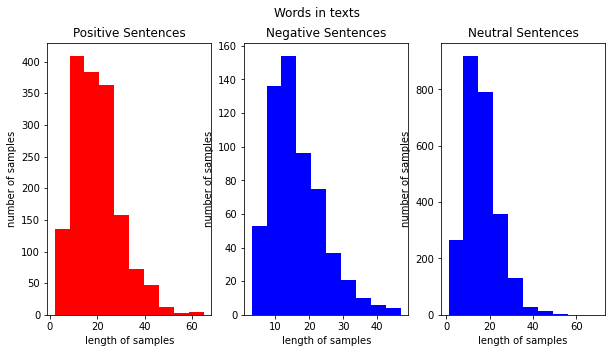

In [ ]:
# matplotlib 시각화
# 부정 문장보다는 긍정 문장이 더 길게 작성
fig,(ax1,ax2, ax3) = plt.subplots(1,3,figsize=(10,5))

text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax3.hist(text_len, color='blue')
ax3.set_title('Neutral Sentences')
fig.suptitle('Words in texts')
ax3.set_xlabel('length of samples')
ax3.set_ylabel('number of samples')
print('중립 문장의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==2]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Sentences')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 문장의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Sentences')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 문장의 평균 길이 :', np.mean(text_len))

plt.show()

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

# 정수 인코딩
등장 빈도 1회인 단어는 제외시킴.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 7856
등장 빈도가 1번 이하인 희귀 단어의 수: 3537
단어 집합에서 희귀 단어의 비율: 45.02291242362526
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.340516395052032


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4321


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')  #oov 는 out of vocabulary
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[694, 836, 47, 40, 32, 12, 7, 8, 158, 141], [695, 2135, 72, 3152, 1, 1337, 23, 45, 416, 20, 3153, 1477, 1114, 49, 1, 837, 963, 1, 3, 1030, 3154, 1, 1, 8, 1338, 6], [1478, 11, 19, 1, 3155, 13, 357, 61, 62, 1479, 2545, 357, 334, 2, 121, 1, 82, 2136, 455, 726, 3156, 1, 6, 357, 75, 2137, 66, 132, 14, 65, 12, 80, 63, 10, 2138, 1, 335, 696, 1645, 91, 20, 4]]


In [ ]:
print(X_test[:3])

[[308, 895, 1, 1, 2688, 1, 1, 672, 1061, 1, 1, 59, 1, 1, 1, 936, 9, 1, 1, 1, 544, 1, 1, 4, 1, 1780], [1, 3780, 1, 433, 2498, 1, 131, 1050, 595, 1, 1, 170, 573, 1, 617, 3730, 348, 1, 1, 170, 143, 192, 1, 87, 1847, 24, 1, 1780, 1, 1, 1, 1, 1, 1638, 672, 1, 790, 3943, 1, 544, 308, 334, 1, 30, 573], [1245, 1210, 761, 1, 151, 583, 1, 34, 1, 67, 1, 1418, 151, 1, 263, 2330, 595, 3277, 55, 1, 1567, 1124, 3330, 1, 67, 1352, 3870, 2193, 1, 334, 262, 263, 2330, 595, 1, 361, 1, 2, 1, 11, 1, 19, 1, 149, 204, 1, 334, 262, 595, 1, 672, 1, 1, 1604, 308, 1, 2299, 1, 1, 2, 1, 352, 23, 1, 2168, 583, 1, 93, 2, 1, 2168, 23, 1, 144, 308, 1, 1, 1, 1, 1, 3730, 9, 1, 407, 3953, 1, 1, 23, 2996, 4, 1, 1, 1]]


# 패딩
서로 다른 길이의 샘플들의 길이를 동일하게 맞춰주는 패딩 작업을 진행.
전체 데이터에서 가장 길이가 긴 문장과 전체 데이터의 길이 분포를 알아보기.

문장의 최대 길이 : 70
문장의 평균 길이 : 17.352640545144805


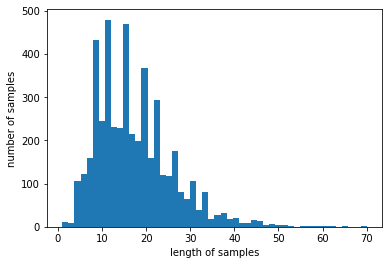

In [ ]:
print('문장의 최대 길이 :',max(len(l) for l in X_train))
print('문장의 평균 길이 :',sum(map(len, X_train))/len(X_train))   #python map함수 사용
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# 패딩 함수 정의
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
# 훈련용 문장의 99.9% 이하가 64 이하의 길이를 가짐
len_list = [70, 65, 50, 45, 40, 30]
for i in len_list:
  below_threshold_len(i, X_train)


전체 샘플 중 길이가 70 이하인 샘플의 비율: 100.0
전체 샘플 중 길이가 65 이하인 샘플의 비율: 99.97870528109028
전체 샘플 중 길이가 50 이하인 샘플의 비율: 99.68057921635435
전체 샘플 중 길이가 45 이하인 샘플의 비율: 99.06303236797275
전체 샘플 중 길이가 40 이하인 샘플의 비율: 98.21124361158434
전체 샘플 중 길이가 30 이하인 샘플의 비율: 92.46166950596252


In [ ]:
max_len = 50

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# pad_sequence()는 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채움.
X_train = pad_sequences(X_train, maxlen = max_len) 
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
X_train.shape 

(4696, 50)

# 원-핫 인코딩

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# GRU를 이용한 분류

In [ ]:
X_train[:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  694,  836,   47,   40,
          32,   12,    7,    8,  158,  141],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  695, 2135,   72, 3152,    1, 1337,   23,   45,  416,
          20, 3153, 1477, 1114,   49,    1,  837,  963,    1,    3, 1030,
        3154,    1,    1,    8, 1338,    6],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1478,   11,   19,
           1, 3155,   13,  357,   61,   62, 1479, 2545,  357,  334,    2,
         121,    1,   82, 2136,  455,  726, 3156,    1,    6,  357,   75,
        2137,   66,  132,   14,   65,   12,   80,   63,   10, 2138,    1,
         335,  696, 16

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, GRU, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) #임베딩 층 추가, 단어를 밀집 벡터로 만듦. 3D 텐서로 리턴
model.add(GRU(hidden_units)) # GRU 층 추가 
model.add(Dense(3, activation='softmax'))

In [ ]:
# 검증데이터손실(val_loss)가 증가하면 과적합 징후이므로, 검증데이터 손실이 3회 증가하면 early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 1) #verbose로 학습이 되는 과정을 볼 수 있다, patience는 개선이 없더라도 기다려줄 횟수
# 검증 데이터의 정확도가 이전보다 좋아진 경우에만 모델 저장 
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only= True) 

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 100)         432100    
_________________________________________________________________
gru_11 (GRU)                 (None, 128)               88320     
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 387       
Total params: 520,807
Trainable params: 520,807
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# loss function으로는 categorical_crossentropy를 사용함. 이는 모델의 예측값과 실제값에 대해서 두 확률 분포 사이의 거리를 최소화하도록 훈련
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  #rmsprop
#model 훈련
history = model.fit(X_train, y_train, epochs=30, callbacks=[es, mc], batch_size= 64, validation_split= 0.2) 

Epoch 1/30
59/59 [==============================] - 3s 27ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 2.9275 - val_accuracy: 0.7245

Epoch 00001: val_accuracy improved from -inf to 0.72447, saving model to best_model.h5
Epoch 2/30
59/59 [==============================] - 1s 19ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 2.8415 - val_accuracy: 0.7330

Epoch 00002: val_accuracy improved from 0.72447 to 0.73298, saving model to best_model.h5
Epoch 3/30
59/59 [==============================] - 1s 18ms/step - loss: 7.5219e-05 - accuracy: 1.0000 - val_loss: 2.7359 - val_accuracy: 0.7404

Epoch 00003: val_accuracy improved from 0.73298 to 0.74043, saving model to best_model.h5
Epoch 4/30
59/59 [==============================] - 1s 19ms/step - loss: 2.1193e-05 - accuracy: 1.0000 - val_loss: 2.7363 - val_accuracy: 0.7383

Epoch 00004: val_accuracy did not improve from 0.74043
Epoch 00004: early stopping


In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test, batch_size = 64)[1])) #evaluate로 test

19/19 [==============================] - 1s 7ms/step - loss: 6.6627 - accuracy: 0.3991

 테스트 정확도: 0.3991
